<Introduction>

<Introduction>

# Identification of Persons Of Interest (POI) from the Enron Dataset

The incidents that led to the bankruptcy of Enron is one of the biggest scandals that shook corporate America in the 21st century. The scandal came to light in 2002, when it was found out that several of the employees, including top executives, were involved in  massive fraud that involved the hiding of billions of dollars in debt from failed deals and projects, from the shareholders through the use of accounting loopholes, special purpose entities, and poor financial reporting. 

In this work, I have with me data regarding 143 previous employees of Enron. The dataset contains the financial and email related information of the employees. Of the 143 employees, 18 of them are labelled as persons of interets (POI). POI are those people who were supsected of their involvment in the scandal. 

In this work, I try to build a classifier, that uses these financial and email related information of the employees to  predict which of the employees are POIs and which are non-POIs. The typical steps of data preprocessing - such as missing value imputaiton, outlier detection, feature engineering, dimension reduction etc., are all performed, after which, a bunch of classifiers are created and validated using appropriate metrics. 

Let us get started.  

In [2]:
import sys
import pickle
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Load the dictionary containing the dataset
with open("final_project_dataset_modified.pkl", "r") as data_file: # Change this path as required!
    data_dict = pickle.load(data_file)


In [3]:
# Convert the data into a dataframe
import pandas as pd
import numpy as np
df = pd.DataFrame.from_dict(data_dict,orient='index')
df.head()
df.shape

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
ALLEN PHILLIP K,201955,2902,2869717,4484442,1729541,4175000,126027,1407,-126027,1729541,...,NaN,2195,152,65,False,NaN,-3081055,304805,phillip.allen@enron.com,47
BADUM JAMES P,NaN,NaN,178980,182466,257817,NaN,NaN,NaN,NaN,257817,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,477,566,NaN,916197,4046157,NaN,1757552,465,-560222,5243487,...,NaN,29,864523,0,False,NaN,-5104,NaN,james.bannantine@enron.com,39
BAXTER JOHN C,267102,NaN,1295738,5634343,6680544,1200000,3942714,NaN,NaN,10623258,...,NaN,NaN,2660303,NaN,False,NaN,-1386055,1586055,NaN,NaN
BAY FRANKLIN R,239671,NaN,260455,827696,NaN,400000,145796,NaN,-82782,63014,...,NaN,NaN,69,NaN,False,NaN,-201641,NaN,frank.bay@enron.com,NaN


(143, 21)

In [14]:
df.columns

Index([u'salary', u'to_messages', u'deferral_payments', u'total_payments',
       u'exercised_stock_options', u'bonus', u'restricted_stock',
       u'shared_receipt_with_poi', u'restricted_stock_deferred',
       u'total_stock_value', u'expenses', u'loan_advances', u'from_messages',
       u'other', u'from_this_person_to_poi', u'poi', u'director_fees',
       u'deferred_income', u'long_term_incentive', u'email_address',
       u'from_poi_to_this_person'],
      dtype='object')

The dataset consists of 143 rows and 21 columns. The columns are a mix of __financial data__ as well as __email related attributes__ associated with each of the employees, which form the rows of the dataframe. 

## Missing Value Imputation for Financial Features 

A cursory look at the dataset shows us a lot of NaN values, however, it should be noted that they are not really NA data type, rather the strings 'NaN'. To use the pandas functionalities of missing value imputation, let us first convert these strings into the nan datatype. I will then list the percentage of missing values in each column

In [12]:
df.replace('NaN',np.nan,inplace=True)

# Calculate and Display the Percentage missing values in each column
df.isnull().sum(axis=0)*100/df.shape[0]

salary                       35.664336
to_messages                  41.258741
deferral_payments            74.125874
total_payments               14.685315
exercised_stock_options      30.769231
bonus                        44.755245
restricted_stock             25.174825
shared_receipt_with_poi      41.258741
restricted_stock_deferred    88.111888
total_stock_value            13.986014
expenses                     35.664336
loan_advances                98.601399
from_messages                41.258741
other                        37.062937
from_this_person_to_poi      41.258741
poi                           0.000000
director_fees                88.811189
deferred_income              67.132867
long_term_incentive          55.944056
email_address                23.776224
from_poi_to_this_person      41.258741
dtype: float64

Let us also briefly summarise the data

In [13]:
df.describe()

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,expenses,loan_advances,from_messages,other,from_this_person_to_poi,director_fees,deferred_income,long_term_incentive,from_poi_to_this_person
count,9.200000e+01,84.000000,3.700000e+01,1.220000e+02,9.900000e+01,7.900000e+01,1.070000e+02,84.000000,1.700000e+01,1.230000e+02,92.000000,2.000000e+00,84.000000,9.000000e+01,84.000000,16.000000,4.700000e+01,6.300000e+01,84.000000
mean,2.665288e+05,2029.190476,8.588645e+05,1.746408e+06,2.477951e+06,1.072704e+06,9.669520e+05,1151.464286,6.218928e+05,2.795166e+06,53966.097826,1.200000e+06,621.571429,3.602622e+05,41.666667,89822.875000,-5.870296e+05,6.825703e+05,63.928571
std,1.319352e+05,2596.483254,1.302648e+06,2.496720e+06,4.226731e+06,1.198264e+06,1.751974e+06,1180.621793,3.845528e+06,4.654469e+06,46292.292167,1.131371e+06,1861.165940,9.280942e+05,101.225304,41112.700735,9.513401e+05,7.816344e+05,87.747555
min,4.770000e+02,57.000000,-1.025000e+05,1.480000e+02,3.285000e+03,7.000000e+04,-2.604490e+06,2.000000,-1.787380e+06,-4.409300e+04,148.000000,4.000000e+05,12.000000,2.000000e+00,0.000000,3285.000000,-3.504386e+06,6.922300e+04,0.000000
25%,2.115140e+05,530.500000,7.771600e+04,3.701908e+05,5.001270e+05,4.125000e+05,2.437125e+05,228.500000,-3.298250e+05,4.676160e+05,22140.500000,8.000000e+05,21.750000,1.197000e+03,1.000000,83674.500000,-6.390935e+05,2.750000e+05,10.000000
50%,2.545700e+05,1136.000000,2.274490e+05,1.095882e+06,1.104054e+06,7.500000e+05,4.410960e+05,733.500000,-1.402640e+05,1.080988e+06,46547.500000,1.200000e+06,41.000000,5.198450e+04,7.500000,106164.500000,-1.440620e+05,4.156570e+05,35.000000
75%,3.042295e+05,2578.500000,8.753070e+05,2.039404e+06,2.286940e+06,1.125000e+06,9.632520e+05,1759.250000,-7.241900e+04,2.497840e+06,78121.500000,1.600000e+06,163.250000,3.440270e+05,24.250000,112815.000000,-3.750600e+04,7.891040e+05,66.250000
max,1.060932e+06,15149.000000,6.426990e+06,1.725253e+07,3.076606e+07,8.000000e+06,1.384707e+07,5521.000000,1.545629e+07,3.076606e+07,228763.000000,2.000000e+06,14368.000000,7.427621e+06,609.000000,137864.000000,-8.330000e+02,5.145434e+06,528.000000


Every single column has missing values, with the exception of the poi column. However, looking at the financial records that came along with the dataset, it seems the NaN values in the financial features imply non-existent, rather than not available. Hence, it would be a good idea to impute the missing values in the columns related to financial features with 0 (zero). 
Additionally, all the columns are numeric, execpt the two columns 'email_address' which is a string and 'poi', which is a boolean.

In [4]:
financial_features = ['salary','deferral_payments','total_payments','exercised_stock_options','bonus','restricted_stock',\
        'restricted_stock_deferred', 'total_stock_value','expenses','loan_advances','other','director_fees',\
        'deferred_income','long_term_incentive']

df[financial_features] = df[financial_features].fillna(0) #Inplace=T not working when multiple columns are selected
df.isnull().sum(axis=0)*100/df.shape[0]

salary                        0.000000
to_messages                  41.258741
deferral_payments             0.000000
total_payments                0.000000
exercised_stock_options       0.000000
bonus                         0.000000
restricted_stock              0.000000
shared_receipt_with_poi      41.258741
restricted_stock_deferred     0.000000
total_stock_value             0.000000
expenses                      0.000000
loan_advances                 0.000000
from_messages                41.258741
other                         0.000000
from_this_person_to_poi      41.258741
poi                           0.000000
director_fees                 0.000000
deferred_income               0.000000
long_term_incentive           0.000000
email_address                23.776224
from_poi_to_this_person      41.258741
dtype: float64

Now we are left with missing values only in columns related to the emails sent and received by the peopel. 

## Missing Value Imputation for Email features

Imputing missing values for Email related features is tricky. There is no clear method to be followed here. Hence, I decide to do this: Group the dataset according to POI or non POI status. Impute missing values with the mean value of the attribute of the relevant group (POI or non-POI) which the employee with the missing data belong to

In [5]:
# impute missing values for emails with mean value grouped by POI
df_group = df.groupby('poi')

poi_group = df_group.get_group(True)
non_poi_group = df_group.get_group(False)

df.loc[df['poi']==True,'shared_receipt_with_poi']=df.loc[df['poi']==True,'shared_receipt_with_poi'].fillna(round(poi_group['shared_receipt_with_poi'].mean()))
df.loc[df['poi']==False,'shared_receipt_with_poi']=df.loc[df['poi']==False,'shared_receipt_with_poi'].fillna(round(non_poi_group['shared_receipt_with_poi'].mean()))

df.loc[df['poi']==True,'to_messages']=df.loc[df['poi']==True,'to_messages'].fillna(round(poi_group['to_messages'].mean()))
df.loc[df['poi']==False,'to_messages']=df.loc[df['poi']==False,'to_messages'].fillna(round(non_poi_group['to_messages'].mean()))

df.loc[df['poi']==True,'from_messages']=df.loc[df['poi']==True,'from_messages'].fillna(round(poi_group['from_messages'].mean()))
df.loc[df['poi']==False,'from_messages']=df.loc[df['poi']==False,'from_messages'].fillna(round(non_poi_group['from_messages'].mean()))

df.loc[df['poi']==True,'from_poi_to_this_person']=df.loc[df['poi']==True,'from_poi_to_this_person'].fillna(round(poi_group['from_poi_to_this_person'].mean()))
df.loc[df['poi']==False,'from_poi_to_this_person']=df.loc[df['poi']==False,'from_poi_to_this_person'].fillna(round(non_poi_group['from_poi_to_this_person'].mean()))

df.loc[df['poi']==True,'from_this_person_to_poi']=df.loc[df['poi']==True,'from_this_person_to_poi'].fillna(round(poi_group['from_this_person_to_poi'].mean()))
df.loc[df['poi']==False,'from_this_person_to_poi']=df.loc[df['poi']==False,'from_this_person_to_poi'].fillna(round(non_poi_group['from_this_person_to_poi'].mean()))




With the missing values imputed, let us now drop the column email_address, as it would not help us in our prediction algorithm

In [6]:
#Drop the email_address colummn since it is no longer useful
df=df.drop('email_address',axis=1)

Let us proceed now to do some exploratory analysis of the financial data.

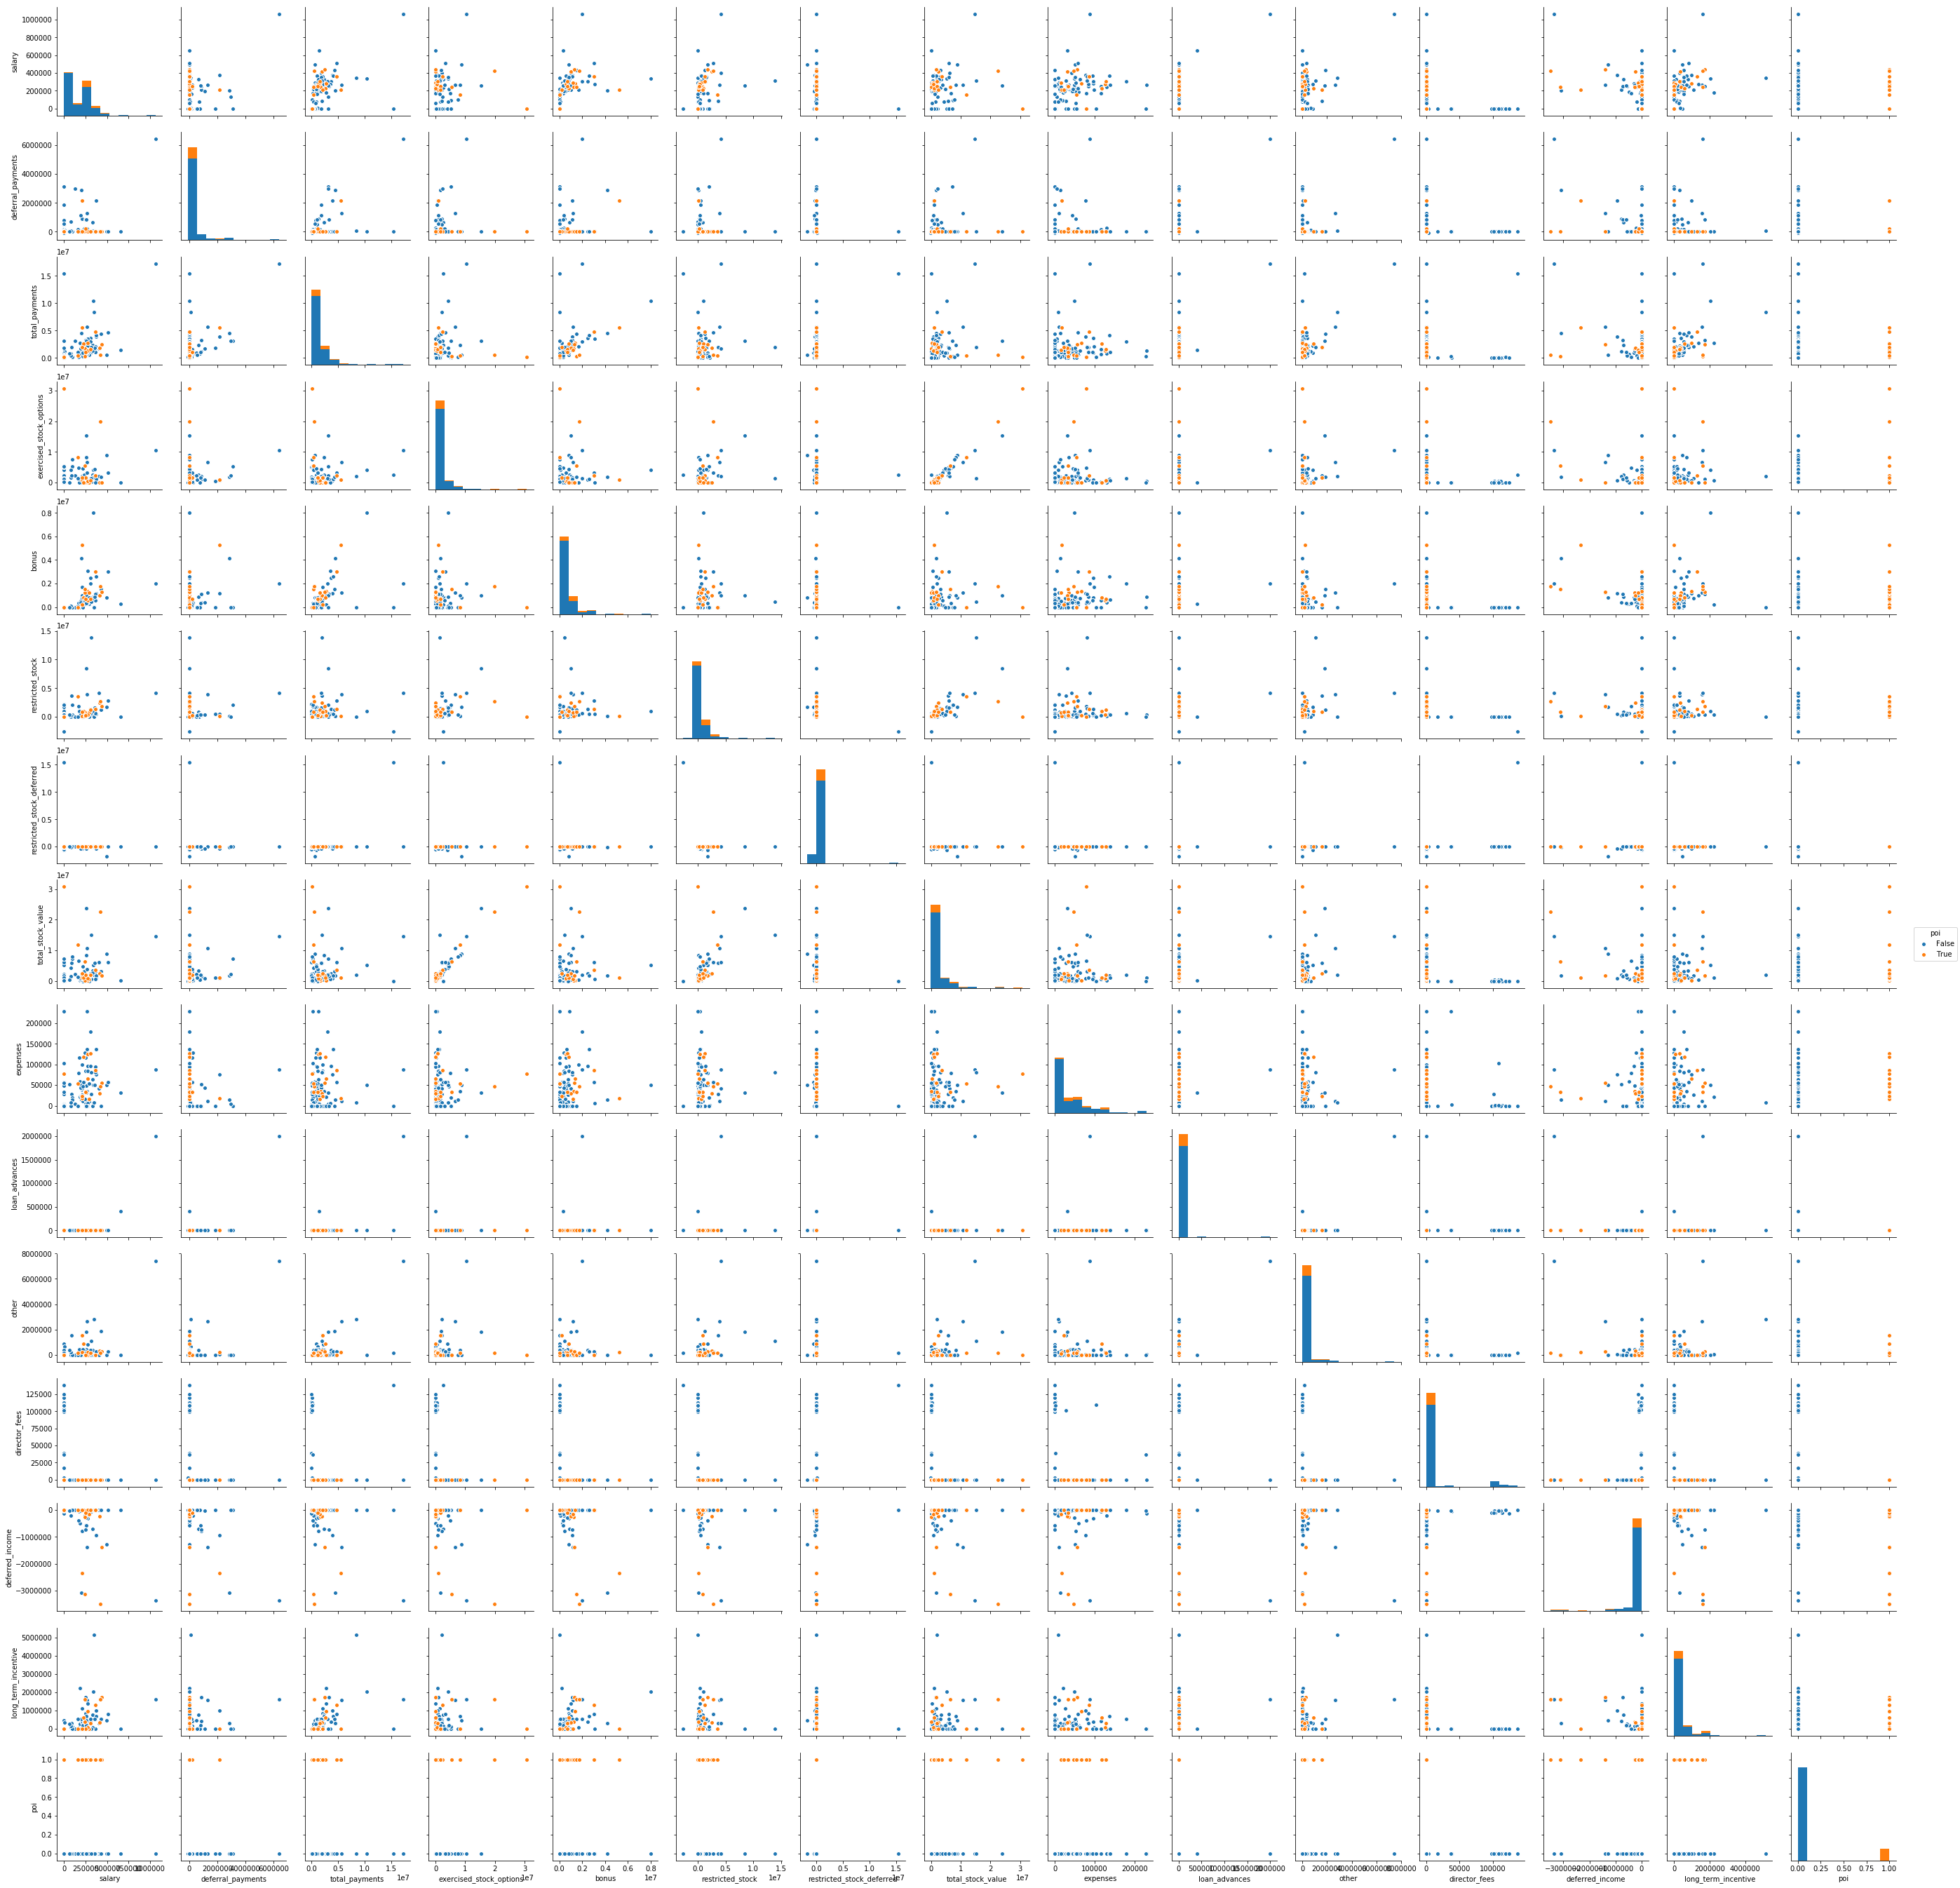

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

cols = financial_features[:]
cols.append('poi')
df_financial = df[cols]
sns.pairplot(df_financial,hue='poi')

## Outlier Detection

The plot is rather cluttered, however, it helps us give a quick summary of the variation of each numerical variable with the other. Note that the POIs and the non-POIs have been indicated with separate colors. If you are running the jupyter notebook, please click on the plot to see a zoomed in version. 

From this plot, we can see that there are a bunch of outliers in the financial data. Some of them are POIs whereas the others are non-POIs. It would be unwise to remove every row with an outlier, since that would result in considerably downsizing our already small dataset. Outliers are, by definition, those are points that lie beyond 1.5 times the interquartile range either above the 75th and or below 25th percentile of a variable. We can detect outlier values for every column in our dataset. Let us do that below 

In [8]:
IQR = df.quantile(q=0.75) - df.quantile(q=0.25)
quartile_1 = df.quantile(q=0.25)
quartile_3 = df.quantile(q=0.75)
outliers =df[(df>(quartile_3 + 1.5*IQR) ) | (df<(quartile_1 - 1.5*IQR) )]

Let us see how many of the rows have at least one outlying values in the columns

In [9]:
outlier_rowwise_count = (outliers.count(axis=1))
outlier_rowwise_count[outlier_rowwise_count!=0].shape

(108,)

108 out of the 143 rows have at least 1 outlying values. Hence eliminating rows with outliers in them is ruled out as an option of treating outliers. One thing we can do is to look at those rows, with majority of values as outliers. Let us look that below

In [10]:
outlier_rowwise_count.sort_values(ascending=False).head(20)

FREVERT MARK A         12
LAVORATO JOHN J         9
BELDEN TIMOTHY N        9
BAXTER JOHN C           8
HAEDICKE MARK E         8
KEAN STEVEN J           7
WHALLEY LAWRENCE G      7
DELAINEY DAVID W        7
KITCHEN LOUISE          6
RICE KENNETH D          6
ALLEN PHILLIP K         5
BUY RICHARD B           5
DERRICK JR. JAMES V     5
HANNON KEVIN P          5
BECK SALLY W            5
PAI LOU L               4
HORTON STANLEY C        4
YEAGER F SCOTT          4
FASTOW ANDREW S         4
ELLIOTT STEVEN          4
dtype: int64

Amongst those that top the list, Frevert Mark A, Lavorato John, Baxter John, Whalley Lawrence and Haedicke Mark are not POIs. They will be removed. Belden Timothy is a POI. Being a POI, it might be of interest to retain him because 1) We have very less POIs in our dataset 2) The outliers associated with them should not be considered a mistake, rather, it might be a consequence of them being POIs, and hence being different from the rest of the members in the dataset

In [11]:
df=df.drop('FREVERT MARK A',axis=0)
df=df.drop('LAVORATO JOHN J',axis=0)
df=df.drop('BAXTER JOHN C',axis=0)
df=df.drop('WHALLEY LAWRENCE G',axis=0)
df=df.drop('HAEDICKE MARK E',axis=0)


Observing the above plot, I find some interesting observations. For instance, take a look at the following plots

1) total_stock_value vs restricted_stock

2) total_stock_value vs total_payments

3) bonus vs total_payments

4) exercised_stock_options vs total_stock_value

In case of these plots, there is seems to be some segregation between POIs and non-POIs, in that the POIs seems to sticking to one region of the plot different from the non-POIs, i.e, they seem to be forming a cluster different from the non-POIs. These facts should help us come up with new features. Let us create some 4 additional features based on the insights above

1) __ratio of bonus to total_payments:__ this indicates the bonus as a fraction of total payments received by the employee. This feature might help us spot POIs , since a POI might have received more than usual bonuses as part of some fradulent activities he or she committed.

2) __ratio of total_stock to total_payments:__ indicating how much of the employees' assets are held as stock. A person who knows about the on-going fraudulent activities in the company might prefer to have less stock, at least when it becomes apparent that the company will crash sooner or later.

3) __ratio of restricted_stock to total_stock_value:__ indicating how much of the employee's stock are restricted. A POI might prefer to have less of their stock restricted.

4) __ ratio of exercised_stock_options to total_stock_value:__ indicating how much of the stock owned by the employee have been exercised. A POI might exercise more of their stock options than a non-POI

We will test these features later to see if they help us in improving our predictions 

In [12]:
# Create the above mentioned financial features
df['bonus_to_tot_pay'] = df['bonus']/df['total_payments']
df['tot_stock_to_tot_pay']=df['total_stock_value']/df['total_payments']
df['rest_stock_to_tot_stock']=df['restricted_stock']/df['total_stock_value']
df['exec_stock_to_tot_stock']=df['exercised_stock_options']/df['total_stock_value']

Let us also engineer couple of new features related to the emails sent and received by the employee. The data set contains two columns by the name **'from_poi_to_this_person'** and __'from_this_person_to_poi'__. These columns indicate respectively the total number of emails the employee has received from a POI and the total number of emails this person sent to a POI. We will create two new features, that calculates the fraction of emails sent by the the employee, that were to a POI, as well as the fraction of emails the employee received, that was from a POI.

In [13]:
# Add email features
df['fraction_from_poi'] = df['from_poi_to_this_person']/df['from_messages']
df['fraction_to_poi'] = df['from_this_person_to_poi']/df['to_messages']
df.isnull().sum(axis=0)*100/df.shape[0]


salary                        0.000000
to_messages                   0.000000
deferral_payments             0.000000
total_payments                0.000000
exercised_stock_options       0.000000
bonus                         0.000000
restricted_stock              0.000000
shared_receipt_with_poi       0.000000
restricted_stock_deferred     0.000000
total_stock_value             0.000000
expenses                      0.000000
loan_advances                 0.000000
from_messages                 0.000000
other                         0.000000
from_this_person_to_poi       0.000000
poi                           0.000000
director_fees                 0.000000
deferred_income               0.000000
long_term_incentive           0.000000
from_poi_to_this_person       0.000000
bonus_to_tot_pay             15.217391
tot_stock_to_tot_pay          2.173913
rest_stock_to_tot_stock      12.318841
exec_stock_to_tot_stock      13.768116
fraction_from_poi             0.000000
fraction_to_poi          

We see that we are still left with some null values in some of our engineered features. These are caused by 0/0 divisions, whenver the denominators contained value 0. Let us impute these missing values with zero.

In [14]:
 #Fill the NA values in the engineered features with zero
df=df.replace([np.inf, -np.inf], np.nan)
df.fillna(0,inplace=True)
df.isnull().sum(axis=0)*100/df.shape[0]

salary                       0.0
to_messages                  0.0
deferral_payments            0.0
total_payments               0.0
exercised_stock_options      0.0
bonus                        0.0
restricted_stock             0.0
shared_receipt_with_poi      0.0
restricted_stock_deferred    0.0
total_stock_value            0.0
expenses                     0.0
loan_advances                0.0
from_messages                0.0
other                        0.0
from_this_person_to_poi      0.0
poi                          0.0
director_fees                0.0
deferred_income              0.0
long_term_incentive          0.0
from_poi_to_this_person      0.0
bonus_to_tot_pay             0.0
tot_stock_to_tot_pay         0.0
rest_stock_to_tot_stock      0.0
exec_stock_to_tot_stock      0.0
fraction_from_poi            0.0
fraction_to_poi              0.0
dtype: float64

Now we have our dataset ready, with the new features incorporated and the missing values imputed. In other words, we are done with 'cleaning' the dataset. Before proceeding further, let us do one final data sancity check to validate the consistency of the data. Our data contains two columns 'total_payments' and 'total_stock_value'. The total_payments column should have the sum of all payments made to the employee, whereas the total_stock_value should have the sum of all stock values of the employee. Let us see if this is indeed the case in our dataframe

In [15]:
#simple check for human erros
df['total_payments_manual'] = df['deferral_payments']+df['bonus']+df['salary']+df['expenses']+\
                            df['loan_advances']+df['deferred_income']+df['long_term_incentive']+\
                            df['director_fees']+df['other']
df['total_stock_manual']=df['exercised_stock_options']+df['restricted_stock']+df['restricted_stock_deferred']

In [16]:
cols = financial_features[:]
cols.append('total_payments_manual')
df.loc[(df['total_payments']!=df['total_payments_manual'],cols)]

,salary,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,restricted_stock_deferred,total_stock_value,expenses,loan_advances,other,director_fees,deferred_income,long_term_incentive,total_payments_manual
BELFER ROBERT,0.0,-102500.0,102500.0,3285.0,0.0,0.0,44093.0,-44093.0,0.0,0.0,0.0,3285.0,0.0,0.0,-99215.0
BHATNAGAR SANJAY,0.0,0.0,15456290.0,2604490.0,0.0,-2604490.0,15456290.0,0.0,0.0,0.0,137864.0,137864.0,0.0,0.0,275728.0


Well, we see two rows, where the numbers are not adding up. The reason for this was found by comparing the values to the PDF that came along with the dataset which described the financial data of the employees.In case of Sanjay Bhatnagar and Robert Belfer, comparions with the accompanying financial data sheet shows that the values in this row have been shifted by a column to the left (with respect to the original data sheet, not the dataframe in this code). This is the reason for the values to be not adding up properly. 

I shall correct these values manually


In [17]:
# Both of the above persons are non-POI. Let us first fill all the financial and stock columns with zero.
# The fill in the appropriate values
stock_features = ['exercised_stock_options','restricted_stock','restricted_stock_deferred','total_stock_value']
df.loc['BHATNAGAR SANJAY',financial_features] = 0
df.loc['BHATNAGAR SANJAY',stock_features]=0
df.loc['BELFER ROBERT',financial_features]=0
df.loc['BELFER ROBERT',stock_features]=0


df.loc['BHATNAGAR SANJAY','expenses']=137864
df.loc['BHATNAGAR SANJAY','total_payments']=137864
df.loc['BHATNAGAR SANJAY','exercised_stock_options']=15456290
df.loc['BHATNAGAR SANJAY','restricted_stock']=2604490
df.loc['BHATNAGAR SANJAY','restricted_stock_deferred']=-2604490
df.loc['BHATNAGAR SANJAY','total_stock_value']=15456290


df.loc['BELFER ROBERT','deferred_income']=-102500
df.loc['BELFER ROBERT','deferred_income']=-102500
df.loc['BELFER ROBERT','expenses']=3285
df.loc['BELFER ROBERT','director_fees']=102500
df.loc['BELFER ROBERT','total_payments']=3285
df.loc['BELFER ROBERT','restricted_stock']=44093
df.loc['BELFER ROBERT','restricted_stock_deferred']=-44093

## Prediction of POIs using Machine Learning

Now that we have removed some outliers from our dataset, we are ready to apply Machine Learning Algorithms to check how good they are in detecting POIs in the dataset. Let us do that now

In [18]:
# Generic prerequisites
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold #Since we are dealing with imbalanced class labels here
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

Let us define couple of functions which will be useful later. First is a generic k-fold cross validator. It can take in any classifier, data and number of splits as input. It will return the average accuracy, precision and recall obtained after the k-fold cross validation. The second function prints out the name as well as score of the k-best features from the output of the selectKBest algorithm of sklearn 

In [19]:
# For k-fold cross validation
def k_fold_validator(estimator,X,y,splits):
    skf = StratifiedKFold(n_splits=splits)
    acc_sum = 0
    precision_sum=0
    recall_sum=0
    for train, test in skf.split(X,y):
        X_train, X_test = X[train], X[test]
        y_train, y_test = y[train], y[test]
        estimator.fit(X_train,y_train)
        y_pred = estimator.predict(X_test)
        acc_sum += estimator.score(X_test, y_test)
        precision_sum = precision_sum+precision_score(y_test,y_pred)
        recall_sum = recall_sum+recall_score(y_test,y_pred)
    average_accuracy = acc_sum/splits
    average_precision = precision_sum/splits
    average_recall = recall_sum/splits
    print ('Cross Validation Accuracy:{}'.format(average_accuracy))
    print ('Average Precision:{}'.format(average_precision))
    print ('Average Recall:{}'.format(average_recall))


def get_important_features(feature_selection,predictors):
    indices = feature_selection.get_support()
    scores = feature_selection.scores_
    feature_list = []
    score_list = []
#    scores = scores.sorted()
    i=0
    for index,score in zip(indices,scores):
        if index:
            #print predictors[i],score
            feature_list.append(predictors[i])
            score_list.append(score)
        i=i+1
 # Create a dataframe
    feature_df = pd.DataFrame({'feature':feature_list,'score':score_list})
    return(feature_df)

Listed below are the all the orignial and engineered features in our data [except poi and email_address. We will select only few out of these features for our prediction. To reduce the number of features we will use the selectKBest algorithm of sklearn

In [20]:
# Intial set of predictors. Includes all the original and engineered featuresThese will be reduced using k-best features
predictors = ['salary',\
              'to_messages',\
              'deferral_payments',\
              'total_payments',\
              'exercised_stock_options',\
              'bonus',\
              'restricted_stock',\
              'shared_receipt_with_poi',\
              'restricted_stock_deferred',\
              'total_stock_value',\
              'expenses',\
              'loan_advances',\
              'from_messages',\
              'other',\
              'from_this_person_to_poi',\
              'director_fees',\
              'deferred_income',\
              'long_term_incentive',\
              'from_poi_to_this_person',\
              'bonus_to_tot_pay',\
              'tot_stock_to_tot_pay',\
              'rest_stock_to_tot_stock',\
              'exec_stock_to_tot_stock',\
              'fraction_from_poi',\
              'fraction_to_poi'\
             ]

X = df[predictors]
y = df['poi']
# Scaling the variables  
from sklearn.preprocessing import scale
X = scale(X)
#

In [21]:
type(X)

numpy.ndarray

In [22]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
feature_selection = SelectKBest(f_classif, k=15).fit(X, y)

In [23]:
best_features = get_important_features(feature_selection,predictors)
best_features.sort_values(by='score',ascending=False)

,feature,score
12,bonus_to_tot_pay,23.260487
9,deferred_income,19.994727
3,bonus,19.654948
11,from_poi_to_this_person,11.859121
0,salary,11.451845
4,shared_receipt_with_poi,11.095520
5,total_stock_value,10.551725
2,exercised_stock_options,10.375338
13,fraction_from_poi,7.452914
1,total_payments,6.260435


Interestingly, the feature that came out to be the most important happened to be one of our newly created feature, viz., the fraction of bonus in the total pay of an employee. The other engineered features (financial) do not appear in the top 15 important features. The features fraction_from_poi and fraction_to_poi are also in the list. Hence 3 of our engineered features happened to be in the top 15 important features

In [24]:
# Now choose only the top 15 features as shown above
top_predictors = best_features['feature']
X = df[top_predictors]
X = scale(X)

In [25]:
X.shape

(138, 15)

With the top 15 features chosen, we can move to our first classifier. We will start with a decision tree classifer. Note, every classifier used below have a set of hyperparameters to be tuned. To find the optimum parameters, I have used a gridsearch to find the optimum parameters. Once after finding the optimum parameters, I also do a manual k-fold cross validation to find the cross validation accuary, precision and recall


### Note 
For all the gridsearch algorithms, I have given f1 score as the scoring metric. Since we have an imbalanced dataset, accuracy is not a good metric to look for. Precision and Recall are more sensible metrics to optimize for this kind of problems. 

Precision indicates how many of the true positives predicted by the algorithm are actually truly positive, whereas recall indicates, of all the total positives in the dataset, how many were correctly identified by the algorithm. Ideally we want high precision and high recall. However, it is the case that an increase in precision is accompanied by a decrease in recall, and vice versa. This is why we use f1-score, the optimised value of which help us attain a balance between precision and recall. In some situations, we might be more concerend about precision, whereas in other situations we might be more concerned about recall. 

A classifier with high precision, (and hence low recall) will yield very less false positives. This implies that the classifier will most likely not wrongly identify a non POI as POI. However, to do this, it might actually fail to detect some POIs, just so as to avoid making mistakes. A classifier with high recall (and hence low precision), might catch all the POIs in the data, but in the process might implicate a lot of non-POIs are POIs as well.

In our problem, we are concerned about identifying POIs. In this particular problem, it is not clear which of the above two situations are more desirable. A POI is just a person of interest; identifying someone wrongly as POI might waste the investigating team's time following a false lead. This is what would happen if the classifier has high recall. However it does not mean the person will be convicted.  The  alternative is to avoid following false leads, and investigate only those people we are sure as POI, at the cost of missing out few POIs. This would happend with a classifier with higher precision.

Personally, I feel the former is preferable, i.e., a classifier with higher Recall. But I leave that as an open question for now. Hence, I am choosing to go for f1 score for the time being, which is the harmonic mean of precision and recall. f1 score tries to find a trade-off between precision and recall. Note that, a classifier that optimizes for precision or recall might suffer a drop in accuracy. Optimizing for f1-score gives us a balance between the 3 metrics. Hence, all the classifiers below have been tuned for the best f1-score   

### 1) Prediction using the reduced number of features 

We will first use the 15 features mentioned above to build our classifier models. We will start with a decision tree classifier

In [26]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Perform a grid search to find the optimum parameters for the decision tree classifier
from sklearn.model_selection import GridSearchCV
parameters = {'min_samples_leaf':[1,2,5,10], 'min_samples_split':[2,5,10,15],'max_depth':[5,8,15]}
DT = DecisionTreeClassifier(random_state=42)
clf_gs = GridSearchCV(cv=10, estimator=DT, param_grid=parameters,scoring='f1',n_jobs=2)
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=7)
clf_gs.fit(X, y)
opt_parameters = clf_gs.best_params_
print ('Optimum Parameters From GridSearch Displayed Below')
opt_parameters
clf_DT = DecisionTreeClassifier(max_depth=opt_parameters['max_depth'],\
                    min_samples_leaf=opt_parameters['min_samples_leaf'],\
                    min_samples_split=opt_parameters['min_samples_split'],\
                    random_state=42)
print ('Performing a manual 10-fold Cross Vaildation\n')
k_fold_validator(clf_DT,X,y,10)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'min_samples_split': [2, 5, 10, 15], 'max_depth': [5, 8, 15], 'min_samples_leaf': [1, 2, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

Optimum Parameters From GridSearch Displayed Below


{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}

Performing a manual 10-fold Cross Vaildation

Cross Validation Accuracy:0.915091575092
Average Precision:0.5
Average Recall:0.45


With the top 15 features, and a set of tuned hyperparameters, we get a 10-fold cross validation accuracy of about 92%, average precision score of 0.5 and average recall of 0.45. This seems to be decent performance, given the less amount of data we have available. Let us try a random forest classifier now

## Warning:
Running the gridsearch given below for the RF classifier might some time to run depending on your machine. It took about 15 minues for me when I performed the same using a quad core machine with 16 GB RAM

In [28]:
# # Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

#Perform a grid search to find the optimum parameters for the Random Forest classifier
#from sklearn.model_selection import GridSearchCV
parameters = {'min_samples_leaf':[1,2,5], 'min_samples_split':[2,5,10],'max_depth':[5,8,15,None],\
              'n_estimators':[120,300,500],'max_features':['log2','sqrt',None],\
              }
RF = RandomForestClassifier(n_jobs=1)
clf_gs = GridSearchCV(cv=10, estimator=RF, param_grid=parameters,scoring='f1',n_jobs=-1)
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=7)
clf_gs.fit(X, y)
opt_parameters = clf_gs.best_params_
print ('Optimum Parameters From GridSearch Displayed Below')
opt_parameters
clf_RF = RandomForestClassifier(max_depth=opt_parameters['max_depth'],\
                    min_samples_leaf=opt_parameters['min_samples_leaf'],\
                    min_samples_split=opt_parameters['min_samples_split'],\
                    n_estimators=opt_parameters['n_estimators'],\
                    max_features=opt_parameters['max_features'])
print ('Performing a manual 10-fold Cross Vaildation\n')
k_fold_validator(clf_RF,X,y,10)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [2, 5, 10], 'n_estimators': [120, 300, 500], 'max_depth': [5, 8, 15, None], 'max_features': ['log2', 'sqrt', None], 'min_samples_leaf': [1, 2, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

Optimum Parameters From GridSearch Displayed Below


{'max_depth': 8,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

Performing a manual 10-fold Cross Vaildation

Cross Validation Accuracy:0.914615384615
Average Precision:0.5
Average Recall:0.4


The random forest classifier is yielding about the same accuracy, precision and recall, as the deicision tree classifier with the 15 features. Now let us move to a logistic regression classifier

In [29]:
# Logsitic Regression Classifier
from sklearn.linear_model import LogisticRegression
parameters = {'penalty':['l1','l2'], 'C':[0.001,0.01,0.1,1,10,100,1000]}
LR = LogisticRegression()
clf_gs = GridSearchCV(cv=10, estimator=LR, param_grid=parameters,scoring='f1',n_jobs=2)
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=7)
clf_gs.fit(X, y)
opt_parameters = clf_gs.best_params_
print ('Optimum Parameters From GridSearch Displayed Below')
opt_parameters
clf_LR = LogisticRegression(penalty=opt_parameters['penalty'],\
                    C=opt_parameters['C'])
print ('Performing a manual 10-fold Cross Vaildation\n')
k_fold_validator(clf_LR,X,y,10)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

Optimum Parameters From GridSearch Displayed Below


{'C': 0.001, 'penalty': 'l2'}

Performing a manual 10-fold Cross Vaildation

Cross Validation Accuracy:0.812271062271
Average Precision:0.345
Average Recall:0.55


The accuracy seems to have reduced with the logistic regrssion classifier. However, the recall seems to have improved, whereas precision seems to have gone down. The model seems to be performing the best till now in terms of recall, but has a lower accuracy and precision than both decision tree classifier and random forest classifier. Let us now check out an SVM classifier

In [30]:
# SVM Classifier
from sklearn.svm import SVC
parameters = {'kernel':['rbf','poly','linear','sigmoid'],\
            'C':[0.001,0.01,0.1,1.0,10.0,100.0,1000.0],\
            'class_weight':[None,'balanced']}
svc = SVC()
clf_gs = GridSearchCV(cv=10, estimator=svc, param_grid=parameters,scoring='f1',n_jobs=4)
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=7)
clf_gs.fit(X, y)
opt_parameters = clf_gs.best_params_
print ('Optimum Parameters From GridSearch Displayed Below')
opt_parameters
clf_svc = SVC(kernel=opt_parameters['kernel'],\
        class_weight=opt_parameters['class_weight'],C=opt_parameters['C'])
print ('Performing a manual 10-fold Cross Vaildation\n')
k_fold_validator(clf_svc,X,y,10)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'kernel': ['rbf', 'poly', 'linear', 'sigmoid'], 'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0], 'class_weight': [None, 'balanced']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

Optimum Parameters From GridSearch Displayed Below


{'C': 1000.0, 'class_weight': 'balanced', 'kernel': 'sigmoid'}

Performing a manual 10-fold Cross Vaildation

Cross Validation Accuracy:0.748315018315
Average Precision:0.350793650794
Average Recall:0.85


This model has the best recall of 0.85, but accurcay has gone down quite a lot. However, the precision is about the same as that of the logistic regression classifier. Note that a baseline model ,which would predict non-POI for every record in our data should yield us an accuracy of above 85%.

### 2) Prediction using all 25 features 

Uptill now we used the top 15 predictors returned by the selectKBest features algorithm for creating our classifiers. With that many predictors, we see that a decision tree or a random forest classifier is performance the best. However, there is no clear rationale as to why we settled for the number 15. Dimension reduction is used when we have a lot of features compared to the number of records in our dataset. In our case, our final cleaned dataset has 138 rows and 25 features (including the engineered features). In this case the ratio of number of features to number of observations is slightly less than 1/5, and is not too low to say that our problem suffers from the curse of dimensionality. Sometmes it is the case that our features count will be more than the number of observations we have in our data. In those situations, we need to go with dimension reduction techniques, such as PCA, Feature selection etc. 

Considering this, let us re-create all of the above classifiers, this time, including all the features we have in our data (the original as well as the engineered set of features). Let us start with the Decision Tree first, then move on to RandomForest, Logistic Regression and SVM



In [42]:
X = df[predictors]
X = scale(X)
X.shape
type(X)

(138, 25)

numpy.ndarray

In [32]:
# Decision Tree Classifier

# Perform a grid search to find the optimum parameters for the decision tree classifier
from sklearn.model_selection import GridSearchCV
parameters = {'min_samples_leaf':[1,2,5,10], 'min_samples_split':[2,5,10,15],'max_depth':[5,8,15]}
DT = DecisionTreeClassifier(random_state=42)
clf_gs = GridSearchCV(cv=10, estimator=DT, param_grid=parameters,scoring='f1',n_jobs=2)
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=7)
clf_gs.fit(X, y)
opt_parameters = clf_gs.best_params_
print ('Optimum Parameters From GridSearch Displayed Below')
opt_parameters
clf_DT = DecisionTreeClassifier(max_depth=opt_parameters['max_depth'],\
                    min_samples_leaf=opt_parameters['min_samples_leaf'],\
                    min_samples_split=opt_parameters['min_samples_split'],\
                    random_state=42)
print ('Performing a manual 10-fold Cross Vaildation\n')
k_fold_validator(clf_DT,X,y,10)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'min_samples_split': [2, 5, 10, 15], 'max_depth': [5, 8, 15], 'min_samples_leaf': [1, 2, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

Optimum Parameters From GridSearch Displayed Below


{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}

Performing a manual 10-fold Cross Vaildation

Cross Validation Accuracy:0.885897435897
Average Precision:0.5
Average Recall:0.4


The decision tree classifier seems to have slightly gone down in accuracy when including all the features. However, on the average the precision and recall does not seem to have changed much. It is to be expected, since decision trees are sensitive towards the number of features, i.e, more the number of features, more the variance will be for the fitted tree. Let us look at the RandomForest algorithm now. 

In [33]:
# # Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

#Perform a grid search to find the optimum parameters for the Random Forest classifier
#from sklearn.model_selection import GridSearchCV
parameters = {'min_samples_leaf':[1,2,5], 'min_samples_split':[2,5,10],'max_depth':[5,8,15,None],\
              'n_estimators':[120,300,500],'max_features':['log2','sqrt',None],\
              }
RF = RandomForestClassifier(n_jobs=1)
clf_gs = GridSearchCV(cv=10, estimator=RF, param_grid=parameters,scoring='f1',n_jobs=-1)
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=7)
clf_gs.fit(X, y)
opt_parameters = clf_gs.best_params_
print ('Optimum Parameters From GridSearch Displayed Below')
opt_parameters
clf_RF = RandomForestClassifier(max_depth=opt_parameters['max_depth'],\
                    min_samples_leaf=opt_parameters['min_samples_leaf'],\
                    min_samples_split=opt_parameters['min_samples_split'],\
                    n_estimators=opt_parameters['n_estimators'],\
                    max_features=opt_parameters['max_features'])
print ('Performing a manual 10-fold Cross Vaildation\n')
k_fold_validator(clf_RF,X,y,10)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [2, 5, 10], 'n_estimators': [120, 300, 500], 'max_depth': [5, 8, 15, None], 'max_features': ['log2', 'sqrt', None], 'min_samples_leaf': [1, 2, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

Optimum Parameters From GridSearch Displayed Below


{'max_depth': 8,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 120}

Performing a manual 10-fold Cross Vaildation

Cross Validation Accuracy:0.908424908425
Average Precision:0.45
Average Recall:0.35


The accuracy is about the same as with 15 features, however the precision and  recall seems to have gone down a bit. However, it doesn't seem like they are significant variations from before. It seems to be more like a random variation

In [34]:
# Logsitic Regression Classifier
from sklearn.linear_model import LogisticRegression
parameters = {'penalty':['l1','l2'], 'C':[0.001,0.01,0.1,1,10,100,1000]}
LR = LogisticRegression()
clf_gs = GridSearchCV(cv=10, estimator=LR, param_grid=parameters,scoring='f1',n_jobs=2)
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=7)
clf_gs.fit(X, y)
opt_parameters = clf_gs.best_params_
print ('Optimum Parameters From GridSearch Displayed Below')
opt_parameters
clf_LR = LogisticRegression(penalty=opt_parameters['penalty'],\
                    C=opt_parameters['C'])
print ('Performing a manual 10-fold Cross Vaildation\n')
k_fold_validator(clf_LR,X,y,10)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

Optimum Parameters From GridSearch Displayed Below


{'C': 100, 'penalty': 'l1'}

Performing a manual 10-fold Cross Vaildation

Cross Validation Accuracy:0.905897435897
Average Precision:0.606666666667
Average Recall:0.8


Well, the logistic regression seems to have improved quite a lot in terms of precision and recall. Accuracy has also improved than earlier, to touch close to 91%. The precision and recall have also improved quite a lot. In fact this classifier is performing much better while using all the features than using a reduced set of features. Let us also look at the SVM classifier, and see how it does with all the features

In [35]:
from sklearn.svm import SVC
parameters = {'kernel':['rbf','poly','linear','sigmoid'],\
            'C':[0.001,0.01,0.1,1.0,10.0,100.0,1000.0],\
            'class_weight':[None,'balanced']}
svc = SVC()
clf_gs = GridSearchCV(cv=10, estimator=svc, param_grid=parameters,scoring='f1',n_jobs=4)
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=7)
clf_gs.fit(X, y)
opt_parameters = clf_gs.best_params_
print ('Optimum Parameters From GridSearch Displayed Below')
opt_parameters
clf_svc = SVC(kernel=opt_parameters['kernel'],\
        class_weight=opt_parameters['class_weight'],C=opt_parameters['C'])
print ('Performing a manual 10-fold Cross Vaildation\n')
k_fold_validator(clf_svc,X,y,10)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'kernel': ['rbf', 'poly', 'linear', 'sigmoid'], 'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0], 'class_weight': [None, 'balanced']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

Optimum Parameters From GridSearch Displayed Below


{'C': 10.0, 'class_weight': 'balanced', 'kernel': 'linear'}

Performing a manual 10-fold Cross Vaildation

Cross Validation Accuracy:0.88336996337
Average Precision:0.58
Average Recall:0.8


The SVM performance is very close to that of the Logistic Regression model, with very similar values for average precision, recall and accuracy from a 10-fold cross validation

 # PCA  - An alternative method to feature selection


The feature selection we employed using selectKBest algorithm was just one of the feature reduction technique. An alternate way to reduce dimensions is using Principal Component Analysis, i.e, PCA. Let us do a PCA on our original data. 

In [36]:
from sklearn.decomposition import PCA
df1 = df.drop(['poi','total_payments_manual','total_stock_manual'],axis=1)
X_pca = df1.values
X_pca = scale(X_pca)
pca_full = PCA()
pca_full.fit(X_pca)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Let us check the explained_variances_ratio attribute to see the percentage variances explained by the components. We will do a cumsum to check how many components we need to take

In [37]:
#import matplotlib.pyplot as plt
perc_variances = pca_full.explained_variance_ratio_
np.cumsum(perc_variances)

#index = np.linspace(1,len(perc_variances),15)
#plt.scatter(np.cumsum(pca_full.explained_variance_ratio_),index)
#plt.show()
#np.linspace(1,len(perc_variances),15)

array([ 0.18119321,  0.29796363,  0.38530185,  0.46341566,  0.53645033,
        0.59128606,  0.6431252 ,  0.68923939,  0.73447125,  0.77603012,
        0.81193933,  0.84620896,  0.87726079,  0.90401537,  0.92468309,
        0.93940136,  0.95281676,  0.96535483,  0.9761263 ,  0.98599332,
        0.99180142,  0.99689306,  1.        ,  1.        ,  1.        ])

We see that about 95% of the variation in the data are explained by the 17 components. We will use them for our classifier. We will use logisitci regression as our classifier, since it gave the best accuracy in our case

In [38]:
pca = PCA(n_components=17)
X_pca_reduced = pca.fit_transform(X_pca)

In [39]:
# Run a grid search for logistic regression classifier
parameters = {'penalty':['l1','l2'], 'C':[0.001,0.01,0.1,1,10,100,1000]}
LR = LogisticRegression()
clf_gs = GridSearchCV(cv=10, estimator=LR, param_grid=parameters,scoring='f1',n_jobs=2)
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=7)
clf_gs.fit(X_pca_reduced, y)
opt_parameters = clf_gs.best_params_
print ('Optimum Parameters Displayed Below')
opt_parameters
clf_LR = LogisticRegression(penalty=opt_parameters['penalty'],\
                    C=opt_parameters['C'])
print ('Performing a manual 10-fold Cross Vaildation\n')
k_fold_validator(clf_LR,X_pca_reduced,y,10)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

Optimum Parameters Displayed Below


{'C': 0.001, 'penalty': 'l2'}

Performing a manual 10-fold Cross Vaildation

Cross Validation Accuracy:0.804578754579
Average Precision:0.351666666667
Average Recall:0.6


We see that both PCA and feature selection is leading to a drop in the performance of the classifier in terms of accuracy, precision and recall. In this case, let us not further dig into PCA.

# Summary
In this work, I looked into a dataset containing the financial details as well as email details of 143 employees of the now defunct company Enron. 18 of these 143 people are Persons of Interest (POI), meaning that they were suspected to be involved in the scandal that led to the bankruptcy of the company. The objective of this work was to build a classifier that identifies the POIs in the dataset accurately.

Some amount of data cleaning was performed to impute missing values in the dataset. The missing values in the financial attributes were imputed with zero, since that was found to be the most probable value for the missing values by analysing the accompanying documents related to financial records. The missing values for email attributes were imputed with hte mean value of the group - ie., POI or non-POI depending on which group the record with the missing value belonged to. Outliers were identified in the dataset, however, instead of removing all records with outliers (which was not possible since almost all records had at least one outlier), I removed those rows with maximum number of outlier values in their columns.

A few new features were created based on intuitition and data exploration. After this, some feature reduction was tried out, by using the selectKBest features algorithm of sklearn. Predictive models were made using this cleaned data set with reduced set of features. A number of different algorithms were tried out. The obtained accuracies and other important metrics such as precision, recall etc have been recorded and tabulated. It was found that feature selection led to a drop in the performance of the classifiers. Hence the final classifiers were made using all the available (including the original and available features). A similar comparison was made after the dimensions of the data were reduced using PCA. It was found that doing PCA also led to a drop in accuracy of the models.